# Simulation of  X-Ray Powder Diffraction
### Computational Physics I 
#### Brian Kerlin


## What is X-Ray Powder Diffraction?

X-ray powder diffraction (XRD) is an analytical technique used to assist in the identification of the phases of a crystalline material. Additionally, it can provide information on the dimensions of the unit cell of the material. Notably, the technique differs from X-Ray crystallography due to the use of a finely ground and homogenized sample instead of a single, well-ordered cystral. 



## Brief Crystal Structure Background

OK. Crystal sturcture is defined as the particular repeating arrangement of atoms, molecules, or ions within a crystal. The particular crystal structure of a material is the minimum-energy arrangement of its constituent components in space. 

#### Unit cell
The structure of a crystal is defined with respect to a unit cell. As the entire crystal consists of repeating unit cells, this definition is sufficient to represent the entire crystal. The length of an edges of the unit cells is known as a lattice parameter.  Examples of two forms of cubic unit cells:


<img src="bcc_fcc.png" alt="Drawing" style="width: 300px;"/>


#### Atom Coordinates and Crystal Planes
Within the unit cell, the positions of atoms are denoted using fractional coordinates measured from a reference point.  When modeling the system, only the smallest asymmetrical set is needed. 

<img src="coordunitcell.png" alt="Drawing" style="width: 300px;"/>

Planes in a crystal can be specified using a notation called Miller indices. The Miller index is indicated by the notation [hkl] where h, k, and l are reciprocals of the plane with the x, y, and z axes. In XRD, the X-ray is a plane wave that is fired at the crystal structure at all angles to ensure 

<img src="graphics11.png" alt="Drawing" style="width: 300px;"/>

## How is the data collected?
![alt text](XRD_schem.jpg "Title")
Powder XRD Schematic. (3)

![alt text](bragg-1.jpg "Title")
![alt text](bragg-2.jpg "Title")
![alt text](examplexrd.png "Title")





In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math



#constant - all lattices
lambda_xray = 1.54056 #Ang # copper-K-alpha source

atom_pos_fcc = [[0.0, 0.0, 0.0], [0, 0.5, 0.5],[0.5, 0.0, 0.5], [0.5, 0.5, 0]] #coordinates of fcc unit cell
atom_pos_bcc = [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]] #coordinates of bcc unit cell
atom_pos_hcp = [[0.0, 0.0, 0.0], [0.333330, 0.6666667, 0],[0.666670,0.333340, 0.5], [0.333330, 0.666670, 0.382000],[0.666670, 0.333340, 0.882000]]


#Atomic Scattering Data

ats_data_df = (pd.read_csv(r'C:\Users\User\ComputationalPhysics300-master\Projects\Atomic_Form_Parameters.csv'))
ats_data = ats_data_df.set_index('Column1').T.to_dict('list')



def hkl_lists():
    h_list = []
    k_list = []
    l_list = []
    for h in list(range(7)):
        for k in list(range(7)):
            for l in list(range(7)):
    
                h_i= h - 3
                k_i= k - 3
                l_i= l - 3
                
                if h_i == 0 and k_i == 0 and l_i ==0:
                    break
                else:
                    h_list.append(h_i)
                    k_list.append(k_i)
                    l_list.append(l_i)
    return h_list, k_list, l_list

h_list, k_list, l_list = hkl_lists()
#need to remove hkl
#print(ats_data)
print(ats_data["'H'"])

def get_parameter(elem):
    g = ats_data[elem]
    a1,b1,a2,b2,a3,b3,a4,b4,c = g[0],g[1],g[2],g[3],g[4],g[6] ,g[6],g[7],g[8]  
    return [[a1,b1],[a2,b2],[a3,b3],[a4,b4]],c

[0.489918, 20.6593, 0.26200300000000004, 7.74039, 0.196767, 49.5519, 0.049879, 2.20159, 0.0013050000000000002]


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: DataFrame columns are not unique, some columns will be omitted.


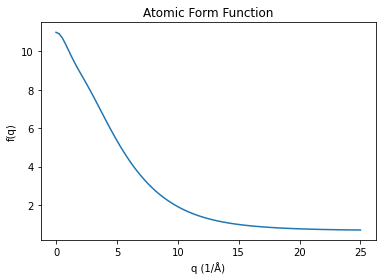

In [11]:

def atomic_scattering_f(q,elm):
    
    #using paramaters (param and C) for a given element and a scattering vector (q),
    #output the atomic scattering factor for a given single atom
    #scattering amplitude is the probability amplitude of the outgoing spherical wave relative to the incoming plane wave in a stationary-state scattering process
    f_atm = 0
    param, c = get_parameter(elem)
    for i in [0,1,2,3]:
        
        f_part = param[i][0]*np.exp(-param[i][1]*((q/(4*np.pi))**2)) #summation 
        #print(f_part)
        f_atm = f_atm+f_part
        
    f_atm = f_atm+c
    
    return f_atm

momentum_transfer = np.linspace(0, 25, 100)  #1/angstrom

atomic_form_fact = []
elem = "'Na'"

for i in range(len(momentum_transfer)):
    
    atomic_form_fact.append(atomic_scattering_f(momentum_transfer[i],elem))


fig = plt.figure()
plt.xlabel("q (1/Å)")
plt.ylabel("f(q)")      
plt.title("Atomic Form Function")
plt.plot(momentum_transfer, atomic_form_fact)     
#plt.xlim([0, 25])



***
$\mathbf{\text{Structure Factor}}$<br>
***
General Equation $$F_{hkl} = \sum \limits _{j}f_j e^{-2\pi i(hx_j+ky_j+\ell z_j)}$$

***

In [12]:
def structure_factor(atom_pos, h, k, l, elem, theta, lambda_xray):
    #input: postions of atoms in unit cell, orientation cell to x-ray, and q
    #output:structure factor, unit of scattering by a single electron (2.82*10^{-15}} m)
    
    rea = 0
    ima = 0
    q = (4*np.pi/lambda_xray)*np.sin(theta) #calc momentum transfer
    f_atm = atomic_scattering_f(q, elem)
    f_st = 0
    for j in atom_pos:
        rea = rea + np.cos(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        ima = ima + np.sin(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        f = f_atm*(complex(rea, ima))
        f_st = f_st + f
    
    return f_st

def structure_factor_2_elem(atom_pos1,atom_pos2, h, k, l, elem1, elem2, theta, lambda_xray):
    #input: postions of atoms in unit cell, orientation cell to x-ray, and q
    #output:structure factor, unit of scattering by a single electron (2.82*10^{-15}} m)
    
    rea = 0
    ima = 0
    q = (4*np.pi/lambda_xray)*np.sin(theta) #calc momentum transfer
    f_atm1 = atomic_scattering_f(q,elem1)
    f_atm2 = atomic_scattering_f(q,elem2)
    f_st = 0
    for j in atom_pos1:
        rea = rea + np.cos(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        ima = ima + np.sin(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        f = f_atm1*(complex(rea, ima))
        f_st = f_st + f
    for j in atom_pos2:
        rea = rea + np.cos(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        ima = ima + np.sin(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        f = f_atm2*(complex(rea, ima))
        f_st = f_st + f
    
    return f_st

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arcsin
  if sys.path[0] == '':


(0.0, 160.0)

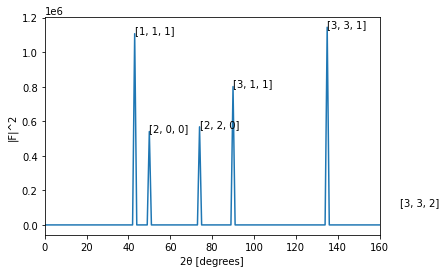

In [13]:

    
def cubic(atom_pos, h_list, k_list, l_list, elem, lambda_xray,lp):
    #output 2theta vs. intensity 
    #for single atom systems
    
    f_result = np.zeros(1120)
    t2 = np.arange(0, 112 , 0.1) #2theta
    t2_hkl = []   #miller indices of peaks

    for i in range(len(h_list)):
        hkl = [h_list[i], k_list[i], l_list[i]]
        d_hkl = lp/np.sqrt(hkl[0]**2+hkl[1]**2+hkl[2]**2)   #interplanar spacing for cubic lattice
        theta = np.arcsin(lambda_xray/(2*d_hkl))         #bragg equation to find theta
        theta_degrees = np.rad2deg(theta) # degrees
        b = math.isnan(theta_degrees)
        if b == True:
            continue
        theta_times_2 = int(round(2*theta_degrees, 0))
        F = structure_factor(atom_pos, h_list[i], k_list[i], l_list[i], elem, theta, lambda_xray)
        PF = 1 +np.cos(2*theta)**2 #polarization_factor
        F_adj = PF*F
        if(f_result[theta_times_2] != 0): #if theta already there add to it, multipliticity
            f_result[theta_times_2] = f_result[theta_times_2] + abs(F_adj)**2
            continue
        else:
            f_result[theta_times_2] = abs(F_adj)**2
            
        max_value = np.max(f_result) #highest intensity in xrd
        if(f_result[theta_times_2] < 0.1*max_value): #if peak is significantly smaller than the max intensity rmeove
             f_result[theta_times_2] = 0
        else:
            hkl_pos =  [abs(ele) for ele in hkl] #make all hkl labels positive, just looks cleaner
            t2_hkl.append([int(round(2*theta_degrees, 0)), hkl_pos]) #for significant values record their hkls to label points
    return f_result, t2_hkl
    
elem = "'Cu'"
lp = 3.628
t2 = np.arange(0, 112 , 0.1) #x_value for plot
final_results, hkl_hits = cubic(atom_pos_fcc, h_list, k_list, l_list, elem, lambda_xray,lp) #y_value for plot, labels


fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")     
for i in hkl_hits:
    plt.text(i[0], final_results[i[0]], i[1])

plt.plot(t2*10, final_results) 
plt.xlim([0,160])







C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arcsin
  if sys.path[0] == '':


(0.0, 90.0)

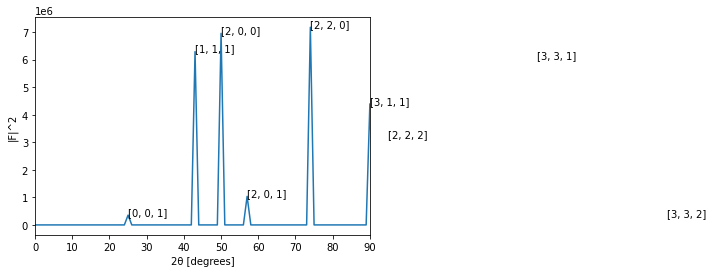

In [14]:
def cubic2(atom_pos1,atom_pos2, h_list, k_list, l_list, elem1, elem2, lambda_xray, lp):
    #output 2theta vs. intensity 
    #for single atom systems
    
    f_result = np.zeros(1120)
    t2 = np.arange(0, 112 , 0.1) #2theta
    t2_hkl = []   #miller indices of peaks

    for i in range(len(h_list)):
        hkl = [h_list[i], k_list[i], l_list[i]]
        d_hkl = lp/np.sqrt(hkl[0]**2+hkl[1]**2+hkl[2]**2)   #interplanar spacing for cubic lattice
        theta = np.arcsin(lambda_xray/(2*d_hkl))         #bragg equation to find theta
        theta_degrees = np.rad2deg(theta) # degrees
        b = math.isnan(theta_degrees)
        if b == True:
            continue
        theta_times_2 = int(round(2*theta_degrees, 0))
        F = structure_factor_2_elem(atom_pos1,atom_pos2, h_list[i], k_list[i], l_list[i], elem1, elem2, theta, lambda_xray)
        PF = 1 +np.cos(2*theta)**2 #polarization_factor
        F_adj = PF*F
        if(f_result[theta_times_2] != 0): #if theta already there add to it, multipliticity
            f_result[theta_times_2] = f_result[theta_times_2] + abs(F_adj)**2
            continue
        else:
            f_result[theta_times_2] = abs(F_adj)**2
            
        max_value = np.max(f_result) #highest intensity in xrd
        if(f_result[theta_times_2] < 0.05*max_value): #if peak is significantly smaller than the max intensity rmeove
             f_result[theta_times_2] = 0
        else:
            hkl_pos =  [abs(ele) for ele in hkl] #make all hkl labels positive, just looks cleaner
            t2_hkl.append([int(round(2*theta_degrees, 0)), hkl_pos]) #for significant values record their hkls to label points
    return f_result, t2_hkl
    

atom_pos1 = [[0, 0, 0], [0.5, 0.5, 0],[0.5, 0.0, 0.5], [0, 0.5, 0.5]] #coordinates of bcc unit cell    ---NA
atom_pos2 = [[0.5, 0.5, 0.05], [0., 0.5, 0],[0.5, 0.0, 0], [0, 0, 0.5]] #coordinates of fcc unit cell     --CL

lattice_constant_NACL = 5.64 #angstroms
elem1 = "'Na+'"
elem2 = "'Cl-'"
t2 = np.arange(0, 112 , 0.1) #x_value for plot
final_results, hkl_hits = cubic2(atom_pos1,atom_pos2, h_list, k_list, l_list, elem1, elem2, lambda_xray, lp) #y_value for plot, labels


fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")     
for i in hkl_hits:
    plt.text(i[0], final_results[i[0]], i[1])

plt.plot(t2*10, final_results) 
plt.xlim([0,90])


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arcsin
  if sys.path[0] == '':


(10.0, 90.0)

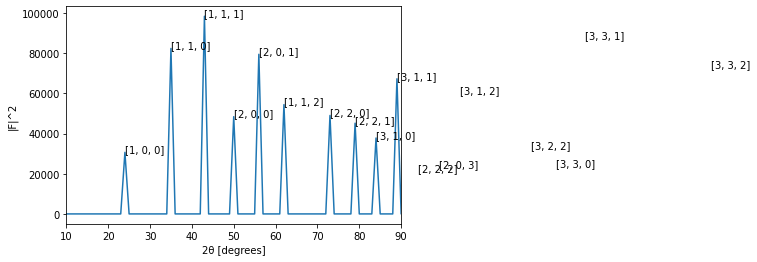

In [15]:
##CsCl ,bcc

atom_pos1 = [[0.5, 0.5, 0.05]] #coordinates of fcc unit cell
atom_pos2 = [[0, 0, 0]] #coordinates of bcc unit cell

lp = 3.65 #angstroms
elem1 = "'Cs+'"
elem2 = "'Cl-'"
t2 = np.arange(0, 112 , 0.1) #x_value for plot
final_results, hkl_hits = cubic2(atom_pos1,atom_pos2, h_list, k_list, l_list, elem1, elem2, lambda_xray, lp) #y_value for plot, labels


fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")     
for i in hkl_hits:
    plt.text(i[0], final_results[i[0]], i[1])

plt.plot(t2*10, final_results) 
plt.xlim([10,90])

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arcsin
  if sys.path[0] == '':


(30.0, 100.0)

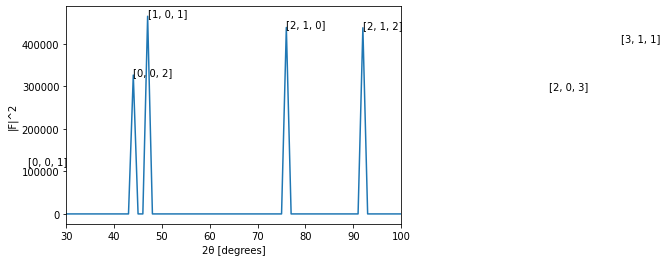

In [7]:

def hcp(atom_pos, h_list, k_list, l_list, elem1, lambda_xray, lp_a, lp_c):
    
    f_result = np.zeros(1120)
    t2 = np.arange(0, 112 , 0.1) #2theta
    t2_hkl = []   #miller indices of peaks

    for i in range(len(h_list)):
        hkl = [h_list[i], k_list[i], l_list[i]]
        if hkl == [0, 0, 0]:
            continue
        d_hkl = np.sqrt(1/((((4/3)*((h_list[i]**2)+(h_list[i]*k_list[i])+(k_list[i]**2)))/(lp_a**2))+((l_list[i]**2)/(lp_c**2))))
        theta = np.arcsin(lambda_xray/(2*d_hkl))         #bragg equation to find theta
        theta_degrees = np.rad2deg(theta) # degrees
        b = math.isnan(theta_degrees)
        if b == True:
            continue
        theta_times_2 = int(round(2*theta_degrees, 0))
        F = structure_factor(atom_pos, h_list[i], k_list[i], l_list[i], elem, theta, lambda_xray)
        PF = 1 +np.cos(2*theta)**2 #polarization_factor
        F_adj = PF*F
        if(f_result[theta_times_2] != 0): #if theta already there add to it, multipliticity
            f_result[theta_times_2] = f_result[theta_times_2] + abs(F_adj)**2
            continue
        else:
            f_result[theta_times_2] = abs(F_adj)**2
            
        max_value = np.max(f_result) #highest intensity in xrd
        if(f_result[theta_times_2] < 0.2*max_value): #if peak is significantly smaller than the max intensity rmeove
             f_result[theta_times_2] = 0
        else:
            hkl_pos =  [abs(ele) for ele in hkl] #make all hkl labels positive, just looks cleaner
            t2_hkl.append([int(round(2*theta_degrees, 0)), hkl_pos]) #for significant values record their hkls to label points
    return f_result, t2_hkl

elem = "'Co'"
lp_a = 2.5071
lp_c = 4.0695
t2 = np.arange(0, 112 , 0.1) #x_value for plot
final_results, hkl_hits = hcp(atom_pos_hcp, h_list, k_list, l_list, elem1, lambda_xray, lp_a, lp_c) #y_value for plot, labels


fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")     
for i in hkl_hits:
    plt.text(i[0], final_results[i[0]], i[1])

plt.plot(t2*10, final_results) 
plt.xlim([30,100])

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arcsin
  if sys.path[0] == '':


(20.0, 70.0)

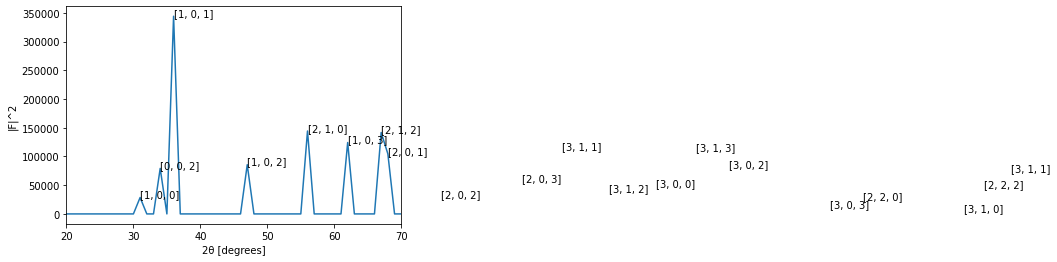

In [8]:
def hcp_2(atom_pos1,atom_pos2, h_list, k_list, l_list, elem1, elem2, lambda_xray, lp_a, lp_c):
    
    f_result = np.zeros(1120)
    t2 = np.arange(0, 112 , 0.1) #2theta
    t2_hkl = []   #miller indices of peaks

    for i in range(len(h_list)):
        hkl = [h_list[i], k_list[i], l_list[i]]
        if hkl == [0, 0, 0]:
            continue
        d_hkl = np.sqrt(1/((((4/3)*((h_list[i]**2)+(h_list[i]*k_list[i])+(k_list[i]**2)))/(lp_a**2))+((l_list[i]**2)/(lp_c**2))))
        theta = np.arcsin(lambda_xray/(2*d_hkl))         #bragg equation to find theta
        theta_degrees = np.rad2deg(theta) # degrees
        b = math.isnan(theta_degrees)
        if b == True:
            continue
        theta_times_2 = int(round(2*theta_degrees, 0))
        F = structure_factor_2_elem(atom_pos1,atom_pos2, h_list[i], k_list[i], l_list[i], elem1, elem2, theta, lambda_xray)
        PF = 1 +np.cos(2*theta)**2 #polarization_factor
        F_adj = PF*F
        if(f_result[theta_times_2] != 0): #if theta already there add to it, multipliticity
            f_result[theta_times_2] = f_result[theta_times_2] + abs(F_adj)**2
            continue
        else:
            f_result[theta_times_2] = abs(F_adj)**2
            
        max_value = np.max(f_result) #highest intensity in xrd
        if(f_result[theta_times_2] < 0.05*max_value): #if peak is significantly smaller than the max intensity rmeove
             f_result[theta_times_2] = 0
        else:
            hkl_pos =  [abs(ele) for ele in hkl] #make all hkl labels positive, just looks cleaner
            t2_hkl.append([int(round(2*theta_degrees, 0)), hkl_pos]) #for significant values record their hkls to label points
    return f_result, t2_hkl

elem1 = "'Zn2+'"
elem2 = "'O'"
lp_a = 3.289
lp_c = 5.307
atom_pos1 = [[0.333330, 0.6666667, 0],[0.666670,0.333340, 0.5]]
atom_pos1 = [[0.333330, 0.666670, 0.382000],[0.666670, 0.333340, 0.882000]]
t2 = np.arange(0, 112 , 0.1) #x_value for plot
final_results, hkl_hits = hcp_2(atom_pos1, atom_pos2, h_list, k_list, l_list, elem1, elem2, lambda_xray, lp_a, lp_c) #y_value for plot, labels


fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")     
for i in hkl_hits:
    plt.text(i[0], final_results[i[0]], i[1])

plt.plot(t2*10, final_results) 
plt.xlim([20,70])

Sources:
https://serc.carleton.edu/research_education/geochemsheets/techniques/XRD.html
https://xrd.co/component-parts-x-ray-diffractometer/
https://www.doitpoms.ac.uk/tlplib/xray-diffraction/powder.php
http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/bragg.html
